In [1]:
import json
import sys
import os
import pickle
from matplotlib import pyplot as plt
from networkx.readwrite import json_graph
import networkx as nx
import numpy as np
import bisect

In [3]:
CN=nx.readwrite.gpickle.read_gpickle('CitationNetwork.pkl')


In [4]:
VN=nx.readwrite.gpickle.read_gpickle('paperVenue_network.pkl')

In [2]:
DatasetDirectory = '/Users/shreya/Desktop/UCLA/Capstone/AMinerDatasetAnalysis/dblp-ref'
verbose = True
load_from_file = True

In [3]:
# Load Json
data_as_jsonList = []

if load_from_file:
    for file in os.listdir(DatasetDirectory):
        if verbose:
            print('Loading File.......'+file)
        f = open(os.path.join(DatasetDirectory,file) , 'r')
        for line in f:
            data_as_jsonList.append(json.loads(line.strip('\n')))
        f.close()
        
#     afile = open(r'/Users/shreya/Desktop/UCLA/Capstone/AMinerDatasetAnalysis/dblp.pkl', 'wb')
#     pickle.dump(data_as_jsonList, afile)
#     afile.close()
    
#     load_from_file= False
else:
    file2 = open(r'/Users/shreya/Desktop/UCLA/Capstone/AMinerDatasetAnalysis/dblp.pkl', 'rb')
    data_as_jsonList = pickle.load(file2)
    file2.close()

print('Total number of entries:'+str(len(data_as_jsonList)))




Loading File.......dblp-ref-0.json
Loading File.......dblp-ref-1.json
Loading File.......dblp-ref-2.json
Total number of entries:3000000


In [4]:
mini_data_as_jsonList = data_as_jsonList[:100000]
print('Total number of entries:'+str(len(mini_data_as_jsonList)))

Total number of entries:100000


In [6]:
#  paper ID to node ID mapping.
nodeCount=0
paperID2nodeID = {}
for paper in data_as_jsonList:
    try:
        paperID2nodeID[paper['id']]=nodeCount
        nodeCount+=1
    except KeyError:
        print('Key error at'+paper['id'])

In [7]:
# Creating a citation network, paper-authorship network and paper-venue network

count = 0
citation_network = nx.DiGraph()

for paper in data_as_jsonList:
    u = paperID2nodeID[paper['id']]
    try:
        for ref in paper['references']:
            if ref in paperID2nodeID.keys():
                v = paperID2nodeID[ref]
            else:
                paperID2nodeID[ref]= v= nodeCount
                nodeCount+=1
            citation_network.add_edge(u,v)
    except KeyError:
         count += 1
            
print(count)

333404


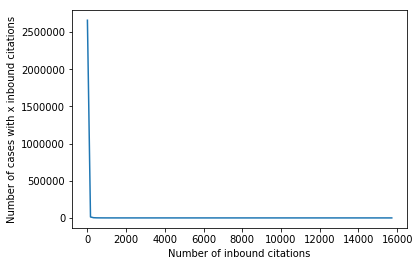

In [13]:
# Degree distribution of the network

degrees = list(citation_network.degree().values())
h, bins= np.histogram(degrees, bins=100)
x_series = bins.compress(h)
y_series = h.compress(h)
plt.plot(x_series, y_series)
plt.xlabel('Number of inbound citations')
plt.ylabel('Number of cases with x inbound citations')
plt.show()

15850

max(degrees)

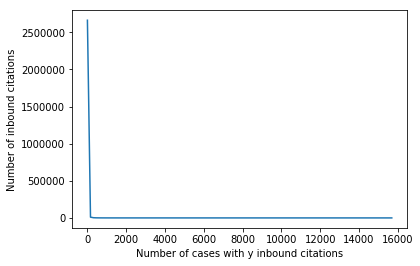

In [9]:
# In Degree distribution of the network

degrees = list(citation_network.in_degree().values())
h, bins= np.histogram(degrees, bins=100)
x_series = bins.compress(h)
y_series = h.compress(h)
plt.plot(x_series, y_series)
plt.xlabel('Number of cases with y inbound citations')
plt.ylabel('Number of inbound citations')
plt.show()

In [22]:
# Find the number of cliques

for clique in nx.find_cliques(CN):
    print(len(clique))


2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
2
2
2
3
2
3
3
3
2
3
2
2
3
2
2
4
4
3
3
3
3
4
3
3
3
2
4
4
3
3
3
3
3
3
3
3
3
3
3
3
3
3
2
2
2
4
3
3
3
3
2
4
3
2
2
2
2
2
2
2
2
2
2
3
3
2
3
2
3
3
2
2
2
2
2
3
3
3
2
2
2
2
2
2
2
3
3
5
5
5
4
5
5
5
3
4
4
4
4
4
4
3
2
3
3
4
4
3
4
3
3
3
3
3
3
3
3
2
4
2
3
3
3
3
3
3
3
2
2
2
3
4
4
4
4
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
4
3
3
4
2
2
3
3
2
3
2
2
4
4
4
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
2
2
2
2
2
2
2
2
2
2
4
4
2
2
2
2
2
2
2
2
2
2
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
2
2
2
2
2
2
2
2
2
2
2
3
3
2
2
2
2
2
2
2
2
2
2
3
3
2
2
2
2
2
2
3
2
2
3
3
3
3
3
2
2
2
4
4
3
3
3
3
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
3
3
3
3
4
4
4
5
4
3
2
2
3
3
3
3
2
2
3
2
2
2
3
3
6
5
5
4
3
2
2
2
4
4
4
4
4
4
4
4
4
3
3
3
3
4
2
2
2
2
4
2
2
2
3
2
2
2
2
2
2
5
5
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
3
3
2
2
2
2
2
2
3
3
2
2
2
2
3
2
2
2
2
2
2
2
3
3
3
2
3
3
3
3
3
4
3
3
3
4
4
4
4
4
4
4
4
4
4
4


4
4
4
5
4
4
4
3
3
3
4
3
3
3
3
2
2
3
3
4
3
3
3
2
3
3
3
4
4
3
3
4
4
3
3
3
3
4
3
5
4
3
3
3
4
4
3
4
4
3
3
3
4
4
4
4
4
3
4
5
5
2
3
4
4
4
4
4
3
3
3
5
4
5
5
3
4
4
4
4
3
3
3
2
4
4
4
5
3
4
5
5
3
3
3
3
3
4
3
3
4
4
3
3
3
5
4
4
3
3
3
2
3
4
3
4
5
5
5
4
4
3
4
4
4
3
4
3
3
4
4
4
4
5
2
3
5
5
3
3
2
3
3
3
3
3
4
3
3
3
3
3
3
3
3
4
4
4
3
3
3
5
4
4
4
3
4
2
2
2
2
2
2
3
4
4
3
3
3
4
4
3
3
3
2
2
3
4
3
3
3
3
3
3
3
3
3
4
4
3
3
3
4
4
4
3
3
3
4
3
3
3
4
2
3
3
5
3
3
2
3
4
4
4
4
4
4
4
4
3
3
3
5
4
4
3
3
4
4
4
4
3
3
4
4
3
4
3
4
4
4
4
3
3
3
3
3
3
3
4
4
4
3
3
3
4
4
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
3
4
4
3
3
3
3
2
3
3
3
3
3
3
4
3
4
3
4
3
3
4
3
3
3
3
3
2
3
3
3
4
4
4
4
4
3
3
4
4
4
4
4
4
3
3
4
4
3
3
3
4
4
3
2
2
4
4
2
3
3
3
3
4
3
3
4
4
3
4
3
3
3
4
3
3
3
3
3
2
2
3
4
3
3
3
3
3
4
4
3
5
4
3
4
4
2
3
2
5
4
4
3
3
3
3
5
4
3
3
2
4
4
3
3
2
2
2
4
4
3
3
3
4
4
4
3
4
3
2
3
4
3
2
4
4
3
3
4
4
4
5
4
4
5
4
3
4
5
3
2
3
3
4
4
4
4
4
4
3
3
3
3
3
3
3
3
4
3
4
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
2
2
3
3
2
3
3
2
4
3
3
3
3
3
4
2
2
2
3
3
3
4
4
3
3
4
3
3
3
2
4
3


2
2
2
3
2
2
2
2
3
3
3
3
2
2
3
3
3
3
2
3
3
2
2
2
3
2
2
2
3
2
2
2
3
2
2
2
2
2
3
4
4
4
4
4
2
2
3
3
2
4
4
3
3
3
2
2
2
2
2
3
3
3
3
4
4
4
4
2
2
2
2
3
3
3
3
3
2
3
3
3
3
3
3
3
3
3
3
3
2
3
4
3
3
3
2
2
2
3
3
3
3
2
2
2
2
2
2
2
2
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
4
4
3
3
3
3
3
3
4
4
3
4
5
3
3
2
2
3
2
4
4
4
3
2
2
2
3
2
2
2
2
3
3
3
3
3
3
4
4
4
4
2
3
2
2
2
2
2
2
2
2
2
2
2
3
3
2
3
2
2
2
2
2
2
2
2
2
2
3
3
4
4
4
3
3
3
3
3
3
3
3
3
3
3
3
3
5
3
3
2
3
2
2
2
2
2
3
3
3
3
3
3
3
2
2
2
2
2
2
3
3
3
4
4
3
3
2
2
2
2
2
3
3
3
2
2
2
2
2
3
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
4
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
3
3
3
2
3
2
2
3
4
3
3
2
3
3
2
2
3
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
2
2
5
5
3
4
5
4
4
4
3
4
4
4
5
4
5
5
4
4
4
3
3
5
4
4
5
5
5
5
4
3
3
3
3
3
3
3
4
4
3
3
3
3
3
3
4
4
2
4
3
3
3
3
3
3
3
3
5
2
4
3
4
4
4
3
4
3
3
3
3
2
2
3
3
3
4
4
2
2
2
3
3
2
2
2
2
3
3
3
2
4
3
3
4
3
3
4
4
3
3
3
2
2
2
2
2
3
2
4
3
3
2
2
2
2
3
3
3
3
3
2
3


2
2
3
3
3
3
3
2
2
2
2
2
3
2
2
2
3
3
2
2
3
2
3
3
3
3
3
4
4
3
3
2
2
2
2
2
2
2
3
2
3
2
2
2
3
3
3
2
3
4
3
3
3
3
2
2
3
3
3
3
3
3
3
4
3
3
4
3
3
3
3
3
4
3
3
2
2
4
3
3
4
4
4
4
4
2
4
4
3
4
4
4
3
3
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
2
2
2
3
2
3
3
2
2
3
4
2
2
2
2
2
2
2
2
3
3
2
2
2
3
2
3
3
2
2
2
2
3
3
3
2
2
2
2
2
2
3
3
2
3
3
2
2
2
2
2
2
2
2
2
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
3
3
2
2
3
3
3
4
3
3
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
2
2
2
3
3
3
2
3
2
2
3
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
2
3
2
2
2
2
3
2
2
2
2
2
4
3
3
2
2
2
2
3
3
2
2
2
2
2
2
2
3
2
2
2
2
4
2
3
2
4
3
3
3
3
3
2
2
2
2
3
2
3
3
3
3
3
3
3
3
3
4
3
3
2
3
4
3
4
4
3
3
4
4
4
4
3
3
3
4
3
3
3
3
4
3
3
2
3
2
4
4
4
3
3
2
2
3
3
2
2
3
2
3
3
2
3
4
4
2
3
2
2
3
3
3
2
2
2
2
2
3
2
3
4
3
3
3
3
3
3
3
3
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
2
2
2
2
2
2
2
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2


4
4
4
3
3
4
6
6
6
6
5
5
5
5
6
5
5
6
5
3
3
3
5
5
6
6
6
3
3
5
3
3
3
3
2
2
2
2
2
2
2
2
3
3
2
2
2
3
2
3
3
2
2
2
3
4
4
3
3
3
2
3
3
2
2
2
3
2
2
3
2
2
2
3
2
2
2
5
5
5
4
4
4
4
3
3
3
2
5
4
5
5
4
3
3
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
3
3
2
2
2
2
2
2
2
2
2
2
2
3
4
4
4
4
4
4
5
5
2
2
2
2
2
2
2
2
2
2
2
5
5
4
4
2
2
2
2
2
2
3
2
3
3
3
2
2
2
2
3
3
2
2
2
2
2
2
2
2
2
2
3
3
3
2
2
3
2
3
3
3
3
4
2
2
2
2
3
2
3
2
3
3
3
3
3
5
3
3
2
2
2
4
4
3
3
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
3
3
2
2
2
2
2
2
2
2
2
3
2
3
3
3
4
4
4
3
2
2
2
2
2
2
2
3
2
3
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
2
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
3
3
3
4
4
3
4
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
3
2
2
2
4
4
3
3
3
3
3
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
3
3
2
2
2
2
2
2
3
3
4
3
3
3
3
2
3
3
3
3
3
2
3
3
2
2
2
3
2
3
3
4
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
2
2
2
2
3
3
3
3
3
3
2
2
3
2
2
2
2
2
2
3
2
2
2
2
3
3
3
4
3
3
2
4
4
4
3
5


2
2
2
2
3
3
3
3
3
3
3
3
3
3
3
3
4
4
4
3
3
3
3
3
2
2
2
3
3
2
2
2
3
3
2
2
2
3
3
3
2
2
2
2
2
3
4
2
2
3
3
2
3
3
2
2
2
2
2
2
2
2
2
2
3
3
2
2
2
2
2
2
2
2
2
3
2
2
2
2
3
3
3
3
3
3
3
2
3
2
3
4
4
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
3
3
3
3
3
2
2
2
3
2
2
2
2
2
2
3
3
2
3
2
2
2
2
2
2
3
4
2
2
2
3
3
3
3
4
3
3
3
3
4
4
4
4
4
4
4
4
4
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
3
3
2
3
3
2
2
3
3
3
3
3
3
5
4
3
3
3
3
3
3
3
3
3
3
4
3
3
3
4
3
4
4
4
3
3
3
3
3
2
3
2
2
3
3
4
3
3
3
2
2
3
2
2
2
3
4
5
5
3
3
3
3
3
4
4
5
3
4
3
3
3
4
4
3
3
3
3
3
3
3
3
3
4
2
3
2
3
3
2
2
2
2
2
2
2
4
4
4
3
3
3
3
3
3
3
5
3
2
3
3
3
3
3
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
3
3
2
2
2
2
3
4
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
4
4
4
4
2
3
2
3
5
4
4
3
4
4
2
3
3
3
3
3
3
3
3
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
3
3
2
3
3
3
4
2
2
3
2
2
2
2
3


3
3
3
3
3
2
3
2
2
2
3
3
3
3
3
2
2
2
2
3
3
3
3
3
2
2
3
3
3
3
4
5
4
3
3
5
2
2
3
2
2
2
3
3
2
3
3
2
3
3
2
3
3
3
3
4
3
3
4
4
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
4
3
3
2
2
3
2
3
2
3
3
3
3
3
3
3
3
3
3
3
2
2
2
2
2
2
3
3
2
2
3
3
3
3
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
3
2
2
3
2
2
2
3
2
2
2
2
2
3
3
3
2
2
2
2
2
2
3
2
2
2
2
2
3
2
2
2
2
2
2
2
2
3
2
2
2
2
4
3
3
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
3
2
2
2
2
2
2
3
2
2
2
3
4
4
2
3
3
3
2
2
2
2
2
2
2
2
3
2
3
4
3
3
4
4
3
3
4
4
2
2
3
2
2
2
3
3
2
2
2
3
2
2
2
3
4
3
2
2
2
3
3
2
2
3
3
2
2
2
2
2
3
2
3
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
2
3
3
3
3
3
3
3
4
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
3
3
2
2
2
2
2
2
2
2
2
2
2
3
2
3
2
2
4
3
3
3
2
4
4
4
4
3
4
3
4
4
3
4
6
5
5
6
4
3
3
2
3
3
4
3
3
3
3
2
4
2
4
3
4
4
5
5
5
5
5
5
4
4
4
4
4
4
4
4
5
5
4
4
3
3
4
3
3
3
4
4
4
4
3
3
3
3
4
5
5
4
5
4
3
3
3
2
3
4
3
3
5
3
2
2
4
4
3
2
4
2
2
4
2
2
2
3
3
3
3
3
3
3
2
2
4
3
3
3
5


2
2
2
2
2
2
2
2
2
2
3
3
2
3
2
2
2
2
3
4
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
3
2
2
3
4
5
3
2
2
2
2
2
2
2
2
2
2
5
5
5
5
4
5
5
4
2
3
2
3
4
4
3
3
2
2
3
2
2
3
3
3
3
2
3
3
3
2
4
4
3
3
4
3
3
4
4
4
4
4
3
5
4
4
4
3
3
3
3
3
4
3
4
4
4
3
3
3
2
2
3
3
2
2
2
2
2
2
3
3
2
3
3
2
2
2
3
2
4
4
4
4
3
2
3
3
3
3
3
3
3
2
2
2
3
3
3
2
2
2
2
2
2
2
3
3
2
2
2
3
4
4
4
3
3
2
3
4
3
3
2
2
2
3
3
3
3
3
3
3
2
3
3
3
3
4
3
3
5
4
5
4
4
3
3
3
3
3
3
3
3
3
2
2
2
2
2
2
6
3
3
2
2
6
4
4
3
3
3
3
4
4
3
3
3
4
3
3
3
3
3
4
4
3
3
3
3
2
3
3
3
2
2
3
4
3
3
3
2
2
2
2
2
2
2
2
2
2
2
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
3
2
2
2
2
2
3
3
2
2
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
3
3
2
2
3
2
2
3
3
2
2
4
4
2
2
2
2
2
3
3
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
2
2
2
2
2
2
2
2
2
2
2
2
3
3
2
2
4
4
4
4
5
5
4
2
2
3
2
2
2
3
2
2
2
2
2
2
2
3
4
2
3


2
4
2
2
2
3
4
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
2
2
3
3
3
2
2
2
2
2
2
2
2
2
2
3
3
3
2
2
2
3
2
2
2
3
2
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
2
4
3
2
3
3
3
2
2
2
2
2
4
2
2
2
2
2
4
3
2
2
2
3
3
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
3
3
3
3
4
4
5
4
3
4
2
2
2
4
3
2
2
2
2
3
3
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
2
2
3
3
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
3
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
2
2
2
3
3
3
3
2
2
2
2
2
2
2
2
3
2
2
2
3
3
3
3
3
3
3
3
3
3
3
3
2
3
3
3
3
4
3
3
3
2
2
3
3
3
3
5
4
4
3
3
6
4
4
3
4
4
4
4
3
3
3
3
3
3
3
4
4
4
3
3
2
3
2
2
2
2
2
2
2
2
3
3
2
2
3
3
3
2
2
3
3
3
2
3
3
3
3
3
2
3
3
3
2
2
3
3
3
3
3
3
3
3
3
4
5
4
4
4
3
3
3
2
3
4
4
4
4
4
4
4
2
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
2
2
2
3
2
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
4
3
3
3
3
4
3
3
2
2
2
3
2
2
2
2
2
3
3
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
2
3
2
2
2
3
2
3
2
2
3
3
2
3
3
4
4
5
4
2
2
3
4
3
3
3
2
3
2
3
2
2
3
3
3
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
2
3
2


2
2
2
2
2
2
3
2
2
2
2
2
2
2
3
3
2
2
2
2
2
2
4
4
4
4
3
3
2
2
2
2
3
4
4
4
4
4
4
4
3
4
4
3
2
3
2
2
4
4
4
4
3
3
2
2
4
2
2
2
2
2
2
2
2
3
2
2
2
3
3
3
5
5
6
6
5
4
5
6
6
6
6
6
5
6
5
2
2
3
2
2
3
3
2
2
3
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
3
3
2
3
3
2
2
2
3
3
3
2
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
3
2
2
2
2
2
2
2
2
2
4
4
4
3
3
2
2
2
2
3
2
2
2
3
3
3
3
3
3
2
3
2
2
2
3
2
2
2
2
3
3
3
3
2
2
2
2
2
3
4
4
3
3
4
3
4
5
3
3
3
2
2
3
3
3
3
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
3
3
3
3
3
3
3
3
3
2
2
2
2
2
2
2
2
3
3
2
2
2
2
2
2
2
2
2
2
3
3
2
2
2
3
3
4
3
3
3
3
4
4
5
5
5
5
5
5
2
2
2
2
2
2
2
4
2
2
2
2
2
3
2
2
3
2
2
2
2
2
2
2
2
2
2
3
2
2
3
3
2
2
2
3
3
3
2
2
2
4
4
4
4
3
4
2
5
3
3
4
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
2
3
2
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
2
3
3
3
3
4
4
4
4
2
2
2
2
3
4
2
2
2
3
3
3
3
3
3
3
3
4
4
4


2
4
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
3
2
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
2
2
2
2
2
2
2
2
3
2
2
2
3
2
2
4
3
3
3
2
2
2
3
2
2
2
3
3
3
2
3
2
2
4
3
3
3
3
3
3
3
4
3
4
4
3
4
4
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
2
2
3
2
2
2
2
2
2
2
3
3
2
2
2
2
2
2
2
2
3
3
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
3
3
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
3
2
2
3
2
2
2
2
2
2
2
2
3
3
3
2
2
2
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
3
2
2
2
2
2
2
2
2
3
2
3
2
2
2
3
3
3
3
2
3
2
2
2
2
3
2
2
2
2
2
2
2
2
3
3
3
3
2
2
2
2
2
2
3
2
3
3
3
3
3
5
4
3
3
3
3
3
4
4
3
3
3
3
2
2
3
2
2
2
2
2
2
2
2
2
3
2
3
3
2
3
4
4
3
2
2
3
3
2
2
2
2
2
3
3
2
2
2
2
2
2
2
2
3
3
2
2
3
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
2
2
2
2
2
2
3
4
5
4
2
3
3
2
2
3
4
4
4
2
3
4
3
2
2
2
2
3
2
3
3
3
3
2
3
2
2
2
3
3
2
2
2
2
4
3
2
3
3
3
3
3
3
3
3
4
4
3
3
3
3
3
2
3
3
3
4
4
3
2
2
3
3
3
3
3
2
2
3
4
4
5
4
3
3
3
3
3
3
4
6
5
6
4
3
3
3
2
2
3
3
3
3
3
3
2
3
3
4
3
2
2
3
3
3
2
2
2
3
3
3
3
3
3
3


2
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
3
3
4
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
2
2
2
2
3
2
2
2
2
2
2
4
4
4
2
2
2
2
2
2
2
2
2
2
3
3
2
2
3
3
2
3
3
3
3
3
3
3
3
3
3
3
2
3
3
5
6
5
5
5
6
7
6
5
6
5
6
4
3
3
3
6
6
6
5
5
3
6
6
6
5
5
6
6
6
4
4
4
4
3
4
3
3
3
3
4
4
5
5
5
5
5
5
5
5
3
4
4
4
4
3
3
2
4
4
3
2
5
5
4
5
5
5
5
5
4
4
3
2
2
2
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
4
4
3
3
3
3
3
2
2
2
3
3
3
4
4
4
4
3
4
3
2
2
2
2
2
3
3
3
4
2
2
2
2
2
2
2
2
4
2
2
3
2
2
4
5
3
3
2
2
3
3
2
2
2
2
3
4
4
4
4
5
5
4
3
4
4
4
5
5
4
3
4
4
4
4
3
2
3
4
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
3
3
3
3
3
2
2
2
3
3
3
3
2
3
2
3
3
2
3
2
2
2
3
3
3
2
4
3
3
2
2
2
2
3
3
2
4
2
3
2
2
3
2
2
4
4
4
3
3
2
2
2
2
2
2
2
2
2
2
2
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
2
2
3
2
2
2
2
2
2
3
2
2
2
2
2
3
3
3
3
2
3
3
3
3
3
3
4
3
3
2
2
3
3
2
2
4
4
2
2
2
2
2
3
2
2
2
2
2
2
2
2
4
2
2
2
3
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
3
3
2
2
2
2
2
3
2
2
2
2
2
3
3
3
2
3
3
3
2
3
3
3
3
3
3
2
2


2
2
2
3
2
2
2
3
3
3
2
3
2
3
3
3
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
3
3
2
2
2
3
3
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
3
2
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
4
4
2
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
3
3
2
2
3
3
2
2
3
3
3
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
2
3
2
2
2
2
2
3
4
4
3
3
2
5
3
4
4
4
4
3
2
3
3
2
2
2
2
2
2
2
3
3
2
2
2
3
3
3
2
3
3
2
4
4
4
4
3
4
3
3
3
3
2
2
2
2
2
4
2
2
3
4
4
4
4
2
3
3
3
4
4
4
4
3
3
4
4
4
4
4
4
4
4
4
3
3
3
2
2
2
2
2
2
2
2
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
3
3
2
2
2
2
3
2
2
3
2
2
2
2
2
2
2
2
2
3
3
3
3
2
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
2
2
2
2
2
2
3
3
3
3
3
3
2
4
2
2
3
2
2
2
2
2
2
2
2
2
3
4
4
3
3
2
2
2
3
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
3
2
2
3
2
2
2
2
2
2
2
2
3
3
3
3
3
3
2
2
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
2
2
3
3
3
3
3
2
2
3
3
3
2
2
2
2
2
4
3
3
4
4
3
2
2
2
2
4
3
2
3
3
3
3
3
2
2
2
2
3
3
3
3
2
2
2
2
2
2
2
2


2
2
2
3
2
2
3
2
2
4
3
2
2
3
2
2
2
2
2
2
2
2
3
3
3
2
2
2
3
3
4
3
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
3
3
3
3
2
2
3
2
2
2
2
3
3
2
2
3
3
3
2
2
2
3
3
4
3
4
3
2
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
3
2
3
3
4
2
2
2
3
4
4
3
4
4
4
4
4
4
3
2
2
3
3
4
3
4
2
4
4
2
4
5
5
5
4
3
2
3
3
2
2
2
2
2
2
2
2
2
2
2
3
2
2
3
2
2
4
4
4
4
2
4
4
2
3
2
2
3
2
2
2
4
4
3
3
3
3
4
2
2
4
3
2
2
2
2
3
3
4
5
4
4
5
3
4
5
4
7
6
8
6
5
4
5
6
5
5
3
4
2
3
2
2
2
2
2
2
2
2
2
2
2
3
3
2
2
2
2
2
2
3
2
2
3
2
2
2
2
2
2
2
2
2
2
3
5
3
2
2
2
3
3
2
2
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
3
3
3
3
2
2
2
2
3
3
2
3
3
2
3
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
3
3
3
2
3
3
3
3
2
2
2
2
2
2
2
2
4
4
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
3
3
2
2
2
2
2
2
2
2
2
2
3
3
2
2
3
2
2
2
2
2
2
2
2
3
3
3
3
2
2
2
2
2
2
2
2
2
2
3
2
3
3
3
3
3
2
2
3
2
2
2
2
2
2
2
2
2
3
2
4
3
3
3
3
3
2
3
2
2
2
4
6
4
4
4
4
4
3
2
2
2
3
5
5
5
4
4
3
5
5
5
4
3
3
2
2
3
3
4
4
4
3
3
3
3
2
2
3
2
3
4
4
4
3
2
2
2
3
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2


2
2
2
3
2
2
3
3
2
2
3
3
3
3
2
2
2
2
3
2
2
2
2
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
5
3
3
3
3
3
2
2
2
2
3
4
3
3
2
2
2
2
3
2
2
2
2
4
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
3
3
4
2
2
2
2
2
2
3
3
3
3
3
4
4
3
3
3
3
3
3
2
3
3
3
4
4
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
2
2
3
3
2
2
4
4
4
2
2
3
3
3
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
3
4
5
3
3
2
2
3
2
2
2
2
3
2
2
2
2
2
2
2
3
3
2
2
2
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
2
3
2
3
3
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
2
2
3
3
2
2
2
2
2
3
3
2
4
3
3
3
3
3
3
3
3
3
3
3
2
2
2
2
3
3
3
3
2
2
3
3
3
3
3
3
3
4
3
3
3
3
4
2
2
3
3
2
3
3
2
3
2
2
2
2
2
2
3
3
3
2
2
2
2
2
2
2
3
3
2
2
2
2
2
2
3
4
3
3
2
4
4
2
3
3
3
3
3
3
3
3
3
2
3
3
3
2
2
2
2
2
2
2
2
2
3
2
2
3
2
2
2
2
2
2
3
3
4
3
3
3
2
2
2
2
2
3
3
3
2
2
2
3
3
2
3
2
2
4
3
3
3
3
3
3
3
3
2
2
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
3
4
4
3
2
3
3
4
4
4
4
4
3
3
3
3
3
4
3
3
3
3
2
2
2
2
2
3
2
2
2
2
2
2
2
2
3
2
2
5
4
3
3
4
2
3
4
3
3
4
4
4
3
3
3
3
4
4
4
3
3
3
2
3
4
4
3


2
2
3
3
4
3
3
3
3
2
2
3
4
4
5
5
5
2
3
5
5
4
4
6
6
5
4
3
2
2
2
2
3
3
2
3
3
4
5
2
2
4
3
3
3
4
3
3
3
4
4
3
4
4
4
4
3
4
4
4
3
4
4
2
2
3
3
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
3
3
3
2
3
3
2
2
2
2
2
4
3
3
2
2
2
2
2
2
2
2
2
2
2
2
3
3
2
2
3
2
3
3
2
2
2
2
3
2
2
2
3
2
2
3
3
3
3
3
3
4
3
3
3
3
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
4
2
2
2
3
3
3
3
3
3
3
2
2
3
3
3
3
3
2
3
3
3
2
3
4
3
3
3
4
3
2
2
4
4
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
2
2
2
2
2
2
2
2
2
2
2
2
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
2
2
2
2
2
2
2
4
5
3
2
2
3
2
2
2
2
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
2
5
4
5
5
5
4
5
6
6
6
6
3
5
5
3
4
2
2
2
2
3
2
2
2
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
2
3
3
3
3
3
2
2
3
3
3
2
2
2
4
4
3
3
3
3
3
3
3
3
2
3
3
2
2
2
3
3
3
3
2
2
2
2
2
3
2
2
3
3
3
3
3
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
3
2
3
3
3
2
2
2
2
2
2
2
4
4
3
4
4
4
3
2
2
2
3
3
3
3
2
2
2
2
2
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
4
3
2
2
3
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
4
4
3
3
3
3
3
3
3
2


2
3
3
3
4
3
3
4
2
3
3
3
3
2
2
2
2
2
3
3
3
3
2
2
2
2
3
2
2
2
3
3
3
3
2
2
2
2
2
2
4
2
4
2
4
4
3
3
3
4
3
2
2
4
2
4
4
4
3
4
4
4
3
3
2
2
3
3
3
3
2
2
3
3
3
2
2
2
2
2
2
2
2
2
3
3
5
5
3
3
2
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
4
3
2
2
2
3
2
3
3
3
2
2
3
3
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
3
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
7
7
6
5
4
3
2
4
2
2
3
2
2
2
2
2
2
3
2
2
2
2
3
3
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
4
3
3
3
3
2
4
3
2
3
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
4
2
4
4
4
3
4
3
3
3
3
3
2
3
3
3
3
2
2
2
2
2
2
2
3
4
3
3
3
3
2
2
3
3
2
2
2
2
3
2
2
2
2
3
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
4
4
4
4
4
4
3
2
3
4
3
3
3
4
4
3
4
3
3
3
3
4
3
4
4
3
4
3
3
2
3
3
2
3
2
2
2
3
2
2
2
2
2
3
3
3
3
3
3
2
2
3
3
3
3
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
3
3
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
3
3
3
4
3
3
3
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
2
3
3
2
2
3
3
3
4
4
3
3
3
3
3
3
3
2
3
2
3
3
2
2
3
3


3
2
2
2
2
2
3
5
5
3
4
4
4
5
5
4
3
3
4
4
3
4
2
2
3
3
3
3
2
3
3
4
3
3
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
2
4
4
4
3
4
3
3
4
4
4
4
4
4
4
4
4
2
2
2
4
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
2
2
2
2
2
2
2
2
3
2
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
4
2
2
2
2
2
2
2
2
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
3
3
3
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
4
4
4
4
4
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
2
2
2
2
2
4
4
3
2
2
2
2
2
2
2
2
3
2
4
4
4
3
2
3
2
2
2
2
2
2
3
2
3
2
2
2
4
4
2
2
2
2
2
2
2
2
2
2
2
3
2
2
3
2
3
2
2
2
2
3
2
2
2
2
2
2
2
3
4
3
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
3
3
2
2
2
2
3
3
3
2
2
2
2
2
3
2
2
3
2
2
2
2
2
2
2
2
2
4
4
3
4
4
3
3
3
3
3
3
3
3
3
3
3
3
2
2
3
4
2
2
2
3
3
3
3
3
2
3
3
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
3
4
3
2
3
3
3
3
3
3
3
3
4
3
3
5
5
4
5
4
5
5
5
4
5
5
3
5
4
3
3
2
2
2
3
2
3
4
5
4
4
2
2
2
2
2
2
2
2
2
2
4
4
5
5
5
4
5
5
5
4
4
5
3
4
4
4
5
5
5
4
4
3
2
3
3
3
3
3


2
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
3
2
3
3
3
3
3
3
2
2
3
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
3
3
3
2
2
2
2
3
3
3
3
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
4
3
3
3
5
3
3
3
3
2
3
2
2
2
3
3
3
3
3
3
3
4
2
3
2
2
3
3
2
4
2
2
4
3
3
4
4
4
3
3
3
3
3
3
4
4
4
4
4
4
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
2
2
2
2
2
2
3
3
2
2
2
2
2
2
3
3
3
3
2
3
3
3
2
3
2
2
2
2
2
3
3
3
2
2
2
2
2
3
2
2
2
2
2
2
2
3
3
2
2
3
3
4
5
3
3
2
2
2
2
2
2
2
2
2
3
3
2
2
2
2
2
3
2
2
2
2
3
3
3
3
3
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
2
3
3
2
2
2
4
4
4
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
3
2
2
2
2
3
2
3
3
2
2
2
2
2
2
3
3
2
2
2
2
2
4
2
3
4
4
3
4
4
2
2
3
2
2
2
2
2
2
3
3
3
3
3
2
2
3
3
3
3
3
3
2
3
3
3
3
3
3
3
3
3
3
2
2
2
3
3
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
2
2
4
4
3
2
2
2
2
3
3
4
3
3
4
4
4
4
4
5
5
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
4
4
3
3
4
3
2
2
2
3
2
2
3
3
3
2
2
2
4
2
3
4
5
6
6
6
5
5
6
6
4
5
2
2
2
3
3
2
4


3
3
4
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
3
2
2
2
2
2
3
3
3
3
3
3
3
3
3
4
4
3
3
3
3
2
2
2
3
2
3
3
3
3
4
4
3
3
3
3
3
2
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
2
2
2
2
2
2
2
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
4
3
2
2
2
2
2
3
2
2
2
3
2
2
2
3
3
5
5
3
3
3
3
2
2
4
4
4
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
3
2
2
3
3
3
3
2
3
2
3
3
2
2
2
2
2
2
2
3
3
3
2
2
2
2
2
2
2
3
3
2
2
2
2
2
2
2
3
2
2
2
2
2
2
3
3
3
3
2
2
3
3
3
3
3
3
3
3
3
3
2
2
3
4
3
3
3
3
3
3
4
3
3
4
4
3
3
3
3
3
2
3
3
3
3
2
2
2
2
2
3
3
2
2
2
3
3
3
3
2
2
3
3
2
3
3
3
2
2
2
3
3
3
3
2
3
2
3
3
3
2
2
2
2
3
3
3
2
3
3
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
3
2
2
2
3
3
3
3
2
2
2
2
2
3
2
2
2
2
3
3
3
2
2
3
2
3
2
3
3
3
3
3
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
2
2
3
2
2
2
3
3
3
2
3
3
2
2
3
2
3
2
3
3
3
3
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
3
3
3
2
3
3
2
2
2
2
2
2
2
2
2
3
2
2
3
2
2
2
2
2
2
2
2
2
3
3
3
3
4
2
2
3
2
2
2
2
2
2
2
2


2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
4
4
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
2
3
2
2
2
2
2
2
2
2
2
2
2
2
4
2
2
3
2
3
3
3
3
3
2
2
3
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
3
3
4
4
4
4
2
2
3
3
3
3
2
3
2
2
3
3
2
2
3
2
4
3
3
2
3
4
3
2
3
2
2
3
2
2
2
2
2
2
3
3
3
2
2
2
2
2
2
2
2
2
3
3
3
4
4
4
4
2
2
2
2
5
4
4
4
5
3
5
4
2
3
3
3
3
2
2
2
2
2
2
2
2
4
3
3
3
3
2
3
3
3
3
2
4
2
2
2
2
2
2
2
2
2
2
3
3
3
4
4
3
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
4
4
3
3
4
3
3
3
3
2
2
2
2
2
3
2
2
2
2
2
2
4
3
3
3
3
2
3
3
2
2
3
2
3
3
3
3
3
3
3
2
2
2
2
3
3
3
3
3
3
3
3
3
3
2
2
2
2
3
3
3
3
2
2
2
2
3
2
2
3
4
3
3
4
4
3
3
3
3
3
4
4
4
3
3
2
3
3
3
2
2
2
2
5
5
7
7
5
8
7
7
7
5
5
5
6
6
7
7
6
8
7
6
7
7
5
7
7
9
8
6
5
2
3
4
3
3
3
6
7
7
5
6
8
7
7
9
8
6
7
6
5
5
5
4
4
8
8
6
6
6
6
6
6
7
7
6
6
6
8
8
7
7
6
5
4
4
4
4
5
4
4
5
6
9
9
8
8
7
5
5
5
6
6
8
8
5
6
6
8
8
5
6
3
4
5
3
2
2
2
2
3
3
3
3
2
2
2
3
2
2
2
2
2
2
2
2
3
2
3
3
3
3
3
3
3
3
3
3
4
4
5
5
5
5
3
3
4
4
4
5
3
3
2
2
2
3


4
4
5
4
6
2
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
3
2
3
4
4
3
3
4
3
3
3
3
3
4
4
4
4
2
2
2
2
2
3
2
2
2
3
3
4
4
4
3
3
2
2
2
5
3
3
4
3
3
4
4
4
4
4
2
3
3
3
2
2
2
2
2
2
4
3
2
3
3
3
3
4
4
5
5
5
4
5
4
4
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
2
2
2
2
2
3
2
2
2
3
2
3
3
3
3
3
4
4
2
2
2
3
2
2
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
3
4
3
4
3
4
4
3
4
7
6
5
3
3
4
4
4
5
3
4
4
2
2
3
2
2
3
4
4
4
4
3
2
2
2
2
3
2
2
2
2
3
2
2
2
4
4
4
3
3
2
2
3
2
2
3
3
2
3
3
3
3
4
4
4
4
4
3
4
5
4
4
4
5
5
3
3
2
2
2
2
3
2
2
2
3
2
2
2
2
2
2
2
3
2
2
2
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
2
2
3
3
3
2
2
3
3
3
3
3
3
3
3
3
3
3
2
3
3
2
3
2
2
2
2
6
5
5
5
5
4
5
3
3
3
3
2
3
2
3
3
2
2
2
3
3
3
3
3
3
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
2
2
2
3
2
2
2
2
2
3
2
2
2
2
3
3
3
3
3
3
3
3
2
2
2
2
3
2
2
2
2
2
2
2
2
2
3
2
2
2
2
3
3
3
3
2
3
2
2
2
2
2
2
2
2
4
3
3
2
3
2
3
3
3
3
2
2
3
2
3
4
3
4
3
3
3
3
2
2
3
2


2
2
3
3
3
4
4
3
3
3
2
2
2
3
3
3
4
4
3
3
3
3
3
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
4
3
2
3
3
3
2
2
2
2
2
2
4
4
3
2
2
3
3
3
3
3
3
3
3
3
3
3
3
2
2
3
3
3
3
3
3
2
2
2
2
2
2
2
2
2
3
3
3
3
3
2
2
2
2
3
3
3
3
3
3
3
2
2
4
3
4
3
2
2
2
2
3
3
3
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
3
3
2
2
2
2
2
2
3
3
3
4
3
3
3
3
2
2
3
4
5
3
4
3
3
5
6
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
4
3
4
4
3
2
2
2
3
2
4
3
2
2
3
3
3
2
3
2
3
2
2
2
3
3
3
3
4
3
3
2
2
3
4
4
3
4
4
2
2
4
3
3
4
3
2
4
4
2
4
4
5
5
4
4
4
4
4
4
5
3
4
4
4
4
4
4
2
2
3
2
3
2
2
2
2
2
2
2
2
2
2
2
2
3
3
2
3
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
4
6
6
7
6
4
4
3
5
3
3
3
3
5
5
5
6
6
6
3
3
3
5
3
4
4
6
7
7
7
4
5
5
4
5
5
4
5
5
2
3
2
2
2
2
3
3
2
2
2
2
3
5
4
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
4
4
4
4
2
4
4
4
3
4
3
2
2
2
3
3
3
3
3
3
3
3
3
4
4
4
3
2
3
3
3
2
2
2
2
2
2
2
3
3
3
3
3
2
2
2
2
2
2
2
2
3
4
2
2
2
2
2
2
2
2
2
3
3
2
2
2
2
4
4
3
2
3
2
2
2
2
2
3
3
2
2
2
3
4
4
4
3
3
3
3
3
2
2
3
2
2
2
2
2
2
2
2
2
3
3
3


3
3
3
3
3
3
2
4
3
2
2
2
2
2
2
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
3
2
2
2
2
2
4
3
3
3
2
3
3
2
2
3
2
2
2
2
3
2
2
2
2
2
2
2
2
2
3
2
3
3
3
3
4
4
3
3
4
3
4
3
2
3
3
2
2
2
2
2
3
5
5
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
2
2
3
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
2
3
3
3
3
3
3
3
2
2
2
2
2
2
2
2
3
3
3
2
2
3
2
3
3
3
4
3
2
2
2
2
2
2
2
2
2
2
2
3
3
2
2
2
2
3
3
3
3
3
3
3
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
4
4
3
3
3
2
4
2
2
2
3
2
3
3
2
3
3
3
2
2
2
2
2
3
3
3
3
2
3
3
4
4
5
5
5
4
4
3
3
3
4
3
5
5
5
3
3
5
5
5
5
5
5
5
5
5
5
5
5
5
3
4
3
4
4
5
5
4
4
3
4
3
3
2
4
4
4
4
4
4
4
3
2
3
5
4
4
4
3
3
2
3
3
3
3
3
3
2
3
4
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
2
2
4
4
4
4
4
3
3
2
3
3
4
4
4
4
3
4
3
2
2
3
3
2
2
2
2
3
3
3
4
4
2
2
2
2
2
2
2
3
3
3
3
2
2
2
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
2
3
2
2
2
2
2
3
2
2
2
2
2
2
3
2
2
2
2
2
2


2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
3
2
3
2
2
2
2
2
3
3
3
3
2
2
2
2
2
2
2
3
3
2
2
2
3
2
3
4
3
3
3
3
3
2
2
2
3
3
2
2
2
3
2
2
2
3
3
3
3
3
2
2
2
3
4
4
4
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
3
2
2
3
3
2
2
2
2
3
3
4
3
3
3
2
2
3
3
4
3
4
4
4
4
3
3
2
3
3
3
4
4
3
3
3
3
3
3
3
2
2
3
2
4
3
3
2
2
2
2
2
2
2
2
3
2
2
2
3
2
2
3
3
3
3
3
3
2
3
3
3
3
2
2
2
3
3
2
2
2
2
2
3
3
3
2
2
2
2
3
3
3
2
2
3
2
2
3
2
2
2
2
2
2
2
3
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
2
3
2
3
4
4
3
3
2
2
4
2
2
4
3
3
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
2
3
2
3
3
2
2
2
2
3
2
2
2
3
2
2
3
2
2
2
3
4
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
4
3
3
3
3
2
2
2
2
2
2
2
2
3
3
2
2
2
3
2
3
4
3
4
4
5
4
3
5
4
3
4
4
5
4
4
4
4
4
4
4
5
4
2
3
3
3
3
2
2
2
2
2
2
2
2
2
2
3
3
3
2
2
2
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
2
4
3
2
2
3
3
3
2
2
2
2
2
3
2
2
2
2
2
2
2
3
4
4
2
2
2
3
3
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
3
2
3
3
3
3
3
2
2
2
3
3
3
3
3
3
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
2
2
3
3
3
2
2
2
2
2
2
3
3
2
2
2
2
2
2
3
3


2
3
2
2
2
3
2
2
2
2
4
3
5
3
3
3
3
4
2
2
3
3
2
2
3
2
2
2
2
2
2
2
2
4
3
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
2
2
2
2
2
2
2
3
3
2
2
2
2
3
3
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
4
3
3
2
3
2
2
2
2
2
2
2
2
2
3
3
3
3
4
4
4
4
4
4
4
3
2
2
4
4
4
4
4
4
2
2
3
4
3
3
3
3
2
3
3
4
4
3
3
3
3
3
5
5
4
5
4
5
3
5
3
4
2
3
2
2
3
3
4
4
2
3
3
3
3
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
3
3
2
3
5
6
4
5
5
5
4
3
5
6
5
4
2
4
4
3
3
3
3
3
3
3
2
3
2
2
2
2
2
2
2
2
2
2
3
4
3
2
2
2
2
2
2
2
3
3
3
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
2
2
3
3
3
3
2
2
2
4
3
2
2
2
2
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
2
3
3
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
2
2
2
2
2
2
3
2
2
2
3
2
3
3
4
4
4
3
4
4
3
3
4
4
4
4
4
5
4
5
4
5
5
5
5
3
3
3
3
3
3
4
3
5
3
3
3
4
3
4
3
4
3
3
3
3
4
3
3
2
2
2
2
2
3
3
3
3
3
3
2
2
2
2
3
2
2
3
4
2
2
2
2
3
2
2
2
2
2
2
3
3
3
3
3
3
2
3
4
3


4
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
3
3
3
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
3
3
3
3
3
2
2
2
2
3
2
2
4
3
3
3
3
3
2
3
3
3
4
4
3
3
4
3
3
2
3
3
3
2
2
3
3
3
3
2
2
2
2
2
2
3
2
2
3
3
3
3
2
3
4
2
4
4
4
3
3
3
3
3
3
3
3
3
2
3
2
4
3
3
3
3
3
3
4
3
2
2
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
2
3
3
2
3
3
2
3
3
3
2
3
3
4
3
3
3
3
2
3
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
3
3
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
2
2
2
3
2
2
2
3
3
2
2
3
2
2
2
2
3
3
2
3
3
2
2
2
3
2
3
2
4
2
3
2
2
2
3
2
2
2
3
2
4
4
3
2
2
2
3
2
2
2
2
2
2
2
3
2
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
4
4
4
4
4
4
4
4
4
3
3
3
3
2
2
5
3
3
4
4
4
3
3
5
3
4
5
4
5
4
5
4
4
3
5
3
3
3
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
3
3
2
2
3
2
3
3
2
3
4
4
4
3
3
4
4
4
3
3
2
2
2
4
4
2
2
2
4
3
4
5
3
4
5
5
4
4
4
4
2
3
3
2
2
2
2
3
2
3
3
3
3
3
3
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
2
2
2
3
3
3
3
2
2
2
2
2
2
2
2
2


3
3
4
3
4
4
3
3
3
4
4
3
2
2
3
3
6
6
6
4
5
4
5
4
4
5
4
4
4
4
3
2
3
2
2
2
2
2
4
3
3
3
3
3
3
3
5
5
3
3
3
3
3
3
4
3
7
5
4
6
3
3
4
4
3
3
3
3
7
5
4
6
6
6
3
3
3
3
3
3
3
3
3
4
3
3
3
4
3
4
6
3
3
2
2
2
3
3
3
3
3
4
3
7
5
4
4
6
3
2
3
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
2
2
2
2
2
2
2
3
2
2
3
3
2
2
2
2
3
3
2
2
2
2
2
2
2
2
3
2
2
2
2
2
3
3
3
3
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
2
3
3
2
2
2
2
2
3
3
3
3
2
2
2
3
2
2
2
2
3
4
3
2
3
4
5
4
4
3
4
3
3
4
2
3
3
2
2
2
2
2
2
3
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
3
3
4
4
3
3
3
3
3
3
3
3
3
3
2
2
3
2
2
2
3
3
3
4
4
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
2
2
2
3
3
3
4
3
2
2
3
3
3
3
4
2
3
3
2
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
3
3
2
2
3
4
3
3
2
3
3
3
2
2
2
2
2
3
2
2
3
2
2
3
2
2
2
3
4
3
2
2
4
4
4
3
3
3
3
3
3
3
4
4
4
4
4
4
3
3
3
3
2
3
3
3
3
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
4
4
4
2
2
3
3
2
2
2
2
2
2
3
3
2
5
2
2
3
3
3
2
2
2
2
2
2
2
2
2
2
2
3
2
3
3
3
2
2
2
2
2
2
2
2
3
3
3
3
2
2
3
3
3
3
3
3
3


2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
3
2
2
3
2
3
3
3
3
3
3
3
3
3
3
2
2
2
2
2
3
3
3
2
2
3
3
2
2
2
2
2
2
2
2
2
3
2
2
2
3
3
2
3
3
3
3
3
3
3
3
3
2
2
2
3
3
3
2
2
2
2
2
3
3
3
4
4
3
3
5
4
3
3
2
2
2
2
2
3
2
2
3
2
3
3
3
3
3
4
3
3
3
2
2
2
2
2
2
3
2
2
2
2
3
3
2
3
2
2
2
3
3
2
3
2
2
2
2
2
2
2
3
3
2
2
3
3
2
2
2
2
2
3
3
3
3
2
3
2
3
3
3
2
2
2
2
2
3
3
3
3
3
3
2
3
3
2
2
3
3
3
3
3
3
3
3
3
2
2
2
3
3
5
5
3
2
2
2
4
2
3
2
2
3
3
3
4
3
3
4
3
3
3
3
2
2
2
3
3
2
2
2
2
2
2
2
2
3
3
3
2
2
3
2
2
3
3
4
4
4
4
3
3
2
2
2
2
2
2
2
3
2
2
2
3
2
2
2
2
2
3
3
2
4
3
3
2
2
2
2
2
2
2
2
2
2
4
2
3
3
3
2
2
3
3
3
3
3
4
3
3
3
3
3
3
3
3
2
2
2
3
4
5
4
3
4
3
4
5
6
4
5
3
3
2
2
3
3
6
3
3
2
4
3
2
4
4
4
4
4
3
3
5
5
6
6
6
5
5
5
7
4
6
5
5
5
5
5
4
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
3
2
3
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
2
2
2
2
2
3
3
3
3
3
3
4
3
4
3
3
3
3
2
2
3
3
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
2
2
2
3
4
3
3
3
3
3
3
3
3
3
4
4
4
3
4
4
4
4
4
4


4
4
4
6
6
6
6
5
3
6
6
6
6
6
6
4
5
4
2
4
3
2
2
2
2
2
2
4
4
3
3
3
3
3
4
4
4
3
4
4
4
4
4
3
3
3
3
3
3
3
3
3
4
4
4
4
3
4
4
2
2
2
2
2
2
2
3
4
4
3
3
3
2
3
4
4
4
4
4
4
4
4
4
4
4
4
4
2
3
3
3
3
3
3
3
3
3
4
4
4
4
4
3
4
4
3
3
3
3
5
4
4
3
3
4
4
4
4
4
4
4
4
4
4
3
4
4
4
3
4
3
3
3
4
4
4
3
2
5
3
2
3
3
3
5
3
3
3
3
4
3
4
3
3
3
3
3
3
3
3
3
3
3
3
3
3
2
2
3
2
2
2
2
2
2
2
2
3
4
3
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
3
3
3
3
2
2
2
2
2
2
3
3
2
2
2
2
2
3
4
4
4
5
8
6
6
6
7
8
6
7
7
7
6
6
4
5
8
8
7
7
7
4
4
6
6
5
7
8
7
6
6
4
6
4
3
4
4
5
5
4
3
7
3
3
3
4
3
3
3
3
3
3
3
2
4
4
4
3
3
3
3
3
4
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
3
3
3
2
2
2
2
2
2
2
2
2
2
2
3
4
4
3
2
3
2
2
2
2
2
2
2
2
3
3
3
2
2
2
2
4
3
2
2
3
3
4
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
2
3
3
3
2
3
3
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
2
2
3
2
2
3
2
2
2
2
2
2
2
3
3
2
2
3
4
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
4
3
2
2
2
2
2
2
2
2
2
3
3
3
3
3
4
3
3
2
2
2
3
3
3
3
3
3
3
2
4
3
3
3
3
3


2
2
3
3
3
2
3
3
2
3
3
3
3
3
2
3
3
3
3
3
4
4
5
4
3
3
3
3
3
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
4
3
2
2
2
2
2
2
3
2
2
2
2
2
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
4
4
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
2
3
3
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
4
4
4
3
4
4
4
4
3
3
2
3
3
3
3
3
3
3
2
3
3
3
3
3
3
3
3
3
3
2
2
2
3
2
2
2
3
2
2
2
3
3
3
4
5
6
4
4
5
5
4
4
4
4
4
4
4
3
3
2
4
3
4
3
2
2
2
2
2
2
2
2
2
2
2
3
4
3
3
3
2
3
2
4
3
2
2
2
3
3
4
3
2
2
3
3
3
2
3
4
3
3
3
3
2
3
3
3
2
2
2
3
3
2
2
2
2
2
2
3
2
2
3
2
2
2
3
3
3
3
3
2
2
2
2
3
2
2
2
3
3
3
3
3
2
2
2
2
2
2
2
2
3
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
4
4
4
4
3
3
3
2
2
2
2
2
2
2
2
2
3
2
3
2
2
2
2
2
3
3
2
2
3
2
2
2
3
3
3
2
2
2
2
2
2
4
4
5
5
4
4
4
6
6
5
5
5
4
4
4
4
4
7
6
5
4
5
6
7
6
5
5
5
3
3
3
4
3
3
3
2
2
3
2
2
2
2
3
3
3
3
2
5
5
5
5
5
5
5
5
5
5
4
2
5
4
4
4
5
4
4
3
3
3
2
2
2
2
2
2
2
2
2
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2


2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
4
4
2
2
2
2
2
3
2
2
2
2
3
4
4
4
2
2
2
2
2
3
2
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
4
4
4
3
3
3
3
4
4
3
3
2
2
2
3
2
2
2
2
2
2
2
2
3
4
4
4
3
4
4
3
3
3
3
3
2
2
3
3
3
3
3
3
4
2
3
3
3
3
3
4
4
3
2
3
3
3
4
3
3
3
4
4
3
3
3
2
4
3
3
3
4
3
3
3
3
4
3
3
3
3
3
3
4
3
4
4
2
2
3
3
3
3
3
3
2
4
3
3
3
3
5
4
4
3
3
3
3
3
3
3
2
3
4
2
4
3
3
3
3
3
3
2
3
2
3
3
3
3
2
4
4
3
4
4
4
5
3
4
5
5
4
3
3
3
3
3
3
3
3
3
2
3
3
3
3
3
3
4
5
5
5
5
5
4
5
5
5
5
5
5
5
4
5
5
5
5
5
5
5
5
4
5
5
5
5
5
4
4
4
4
4
4
4
4
4
4
3
3
2
3
2
2
2
2
2
3
3
2
3
2
2
3
3
3
3
3
3
3
2
3
3
3
3
3
2
2
2
3
3
3
3
3
2
3
3
5
4
3
3
2
2
2
2
2
2
2
2
3
3
2
3
3
3
2
2
2
2
2
2
2
2
3
2
2
2
2
2
4
4
3
3
4
3
5
5
4
3
4
4
2
2
3
2
2
2
2
2
3
2
2
2
2
2
3
2
3
3
3
3
2
2
2
2
2
2
3
2
2
2
3
3
2
2
2
2
2
3
2
2
2
2
2
2
3
3
3
2
2
2
4
3
3
2
2
2
3
2
2
3
3
4
5
4
4
5
5
4
3
2
2
3
2
4
2
3
3
3
3
4
3
2
3
3
3
3
3
3
3
4
3
3
3
3
2
3
3
3
3
3
3
3
3
2
2
2
2
2
2
2
2
3
3
3
2
2
2
2
2
4
3
3
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
4
4
4
4
4
3
3
3
3
3
2
3
3
2
3
3
3
3


3
3
3
3
3
2
2
2
2
2
2
2
3
4
2
2
2
2
4
4
4
6
6
6
5
3
5
5
5
5
5
5
5
4
4
3
2
5
5
2
3
3
4
4
4
5
5
2
3
3
5
4
3
3
3
4
3
2
2
2
2
2
2
2
2
3
2
2
2
4
2
2
2
2
4
4
3
2
2
2
2
2
2
2
2
3
3
3
4
3
3
4
3
3
2
3
2
3
2
3
3
3
4
3
3
3
3
3
2
2
2
2
3
3
2
2
2
2
2
2
2
2
2
2
3
2
4
4
4
4
4
3
2
2
3
3
2
2
2
2
2
2
2
2
2
3
3
3
3
2
2
3
2
2
2
2
2
2
2
4
3
3
2
2
2
2
2
2
3
2
2
2
2
2
2
3
3
2
2
2
3
2
2
2
2
2
3
3
3
2
2
2
3
3
3
3
2
2
2
2
2
2
2
2
2
2
4
3
3
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
2
2
3
2
3
3
3
4
2
2
2
2
2
2
2
2
2
2
2
3
4
4
4
5
5
4
4
3
3
3
3
2
3
3
3
2
3
3
2
2
2
2
2
2
3
3
3
2
3
3
2
3
2
2
2
2
2
2
3
3
3
3
2
2
2
2
2
2
2
2
3
4
4
4
4
3
3
3
2
3
3
2
2
2
2
2
2
2
2
2
3
3
4
4
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
4
4
3
2
3
3
2
3
3
2
2
3
3
3
3
3
3
3
3
3
3
4
3
3
3
3
3
3
3
3
2
2
3
2
3
2
2
2
2
2
2
2
3
3
2
2
2
2
3
2
2
2
3
2
3
3
3
2
2
3
2
2
3
2
3
2
2
3
2
2
2
3
2
3
3
2
2
3
2
2
2
2
2
2
2
2
4
4
3
2
2
2
2
2
2
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
3
3
2
2
3
3
2
2
2
2
2
2
4
4
3
3
2
3
2
3
3
3
3
2
2


2
2
2
2
2
2
2
2
2
2
2
2
3
2
3
3
3
4
3
2
2
2
2
2
2
2
4
3
4
3
3
2
3
4
4
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
2
2
2
2
2
2
2
2
2
3
2
2
2
2
3
3
3
3
3
2
3
3
3
2
2
2
2
2
2
2
2
2
2
2
3
2
3
3
3
2
2
2
2
3
2
2
3
3
3
3
3
3
3
2
2
2
2
2
3
2
2
3
3
2
3
2
2
2
2
2
2
3
2
2
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
4
3
3
3
3
3
2
2
3
3
3
3
2
2
2
3
3
3
3
3
3
4
3
2
3
2
3
3
3
2
2
2
3
2
2
2
2
2
3
3
2
2
2
2
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
3
2
2
3
3
4
3
2
3
3
3
3
3
4
3
3
3
3
3
2
2
2
2
2
3
3
4
3
3
4
3
3
3
3
3
3
3
3
3
3
2
2
2
3
3
3
3
3
2
2
2
2
3
3
2
2
3
2
2
3
3
3
3
3
2
3
3
2
2
2
2
3
2
2
2
2
3
3
3
3
3
2
2
3
3
4
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
3
3
4
2
3
2
2
2
2
2
2
3
3
2
2
3
2
2
2
2
2
2
2
3
2
2
2
2
2
3
2
3
2
2
2
2
2
3
3
3
3
3
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
2
2
2
2
2
2
5
5
3
3
3
2
2
5
2
2
2
2
2
2
2
2
2
3
2
2
2


2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
2
2
3
2
3
3
4
3
3
3
3
2
2
2
2
2
2
2
2
3
4
3
3
3
3
2
2
3
2
3
3
3
3
3
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
3
2
3
2
2
2
2
2
2
2
2
2
2
3
3
3
3
2
2
2
2
2
2
2
2
2
2
3
2
2
3
2
2
2
3
3
3
3
3
3
3
2
2
2
2
2
2
2
2
2
3
4
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
4
3
2
2
2
3
3
3
3
3
3
3
3
3
3
3
2
2
2
2
3
4
3
3
4
4
4
2
3
2
3
2
2
2
3
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
3
2
2
3
3
2
3
3
3
3
2
4
5
5
2
3
3
3
2
3
3
4
4
5
5
5
4
3
2
2
3
3
3
3
2
2
2
3
3
3
3
3
2
2
3
3
3
3
2
2
2
2
2
2
2
3
2
2
2
2
3
3
2
3
3
4
4
4
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
4
4
4
4
4
4
3
3
3
2
2
3
2
3
4
4
4
4
2
2
2
2
2
3
5
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
3
2
2
2
3
3
2
3
3
2
3
3
3
3
3
2
2
2
3
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
3
3
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
5
6
4
5
6
6
6
7
7
7
4
3
3
3
3
3
3
3
3
3
3
4
3
3
3
3
4
2
2
2
2
2
2
2


4
4
4
5
2
3
3
3
3
2
3
3
3
3
3
2
2
2
3
3
2
2
2
2
2
2
2
2
2
3
2
3
3
3
2
3
3
2
3
2
2
3
2
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
3
3
3
2
2
2
2
2
2
2
2
3
3
2
4
3
3
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
3
3
2
2
2
2
3
2
2
2
2
2
2
2
2
2
3
3
2
2
2
2
2
2
2
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
2
2
2
2
4
4
3
2
2
2
3
2
2
2
3
3
3
4
3
3
3
3
3
3
3
3
3
2
2
2
3
4
4
4
4
3
3
3
3
3
4
4
4
3
4
5
5
5
4
5
5
3
3
2
2
3
2
2
2
3
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
2
3
3
3
3
3
2
3
4
3
3
3
3
3
3
3
3
3
2
2
2
2
3
2
2
2
2
2
2
3
3
2
2
3
3
2
2
2
2
2
3
2
2
2
2
2
3
3
3
2
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
4
2
2
2
2
2
2
2
2
2
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
4
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
4
4
3
3
3
4
3
3
2
3
4
4
4
3
4
4
4
2
2
2
2
2
2
2
2
2
3
3
2
2
3
2
2
4
3
3
2
2
4
4
4
5
5
5
3
2
4
4
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
2
3
3


3
3
2
2
3
3
5
6
2
3
3
4
3
3
2
2
2
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
3
2
4
2
3
3
3
2
3
2
2
2
3
3
2
2
3
3
5
4
4
4
3
2
2
3
3
3
2
3
3
3
4
2
4
4
2
2
2
2
3
2
2
2
2
3
2
2
2
2
2
2
2
2
2
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
4
3
2
4
4
2
2
2
2
2
3
2
2
2
2
2
2
3
3
3
2
3
3
3
3
3
3
2
3
3
2
3
2
2
2
2
2
2
2
3
3
3
3
4
4
4
4
3
4
4
2
3
5
5
4
4
2
2
5
4
2
5
5
2
2
2
5
4
4
4
4
4
3
3
3
4
5
4
4
3
3
3
3
5
4
3
3
5
4
3
3
3
3
3
4
4
4
4
3
2
2
2
2
2
2
3
2
2
3
2
2
3
3
4
4
4
4
5
5
4
3
4
4
4
4
3
2
2
3
2
2
3
2
2
2
2
2
2
3
2
2
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
4
4
2
4
2
4
2
2
2
2
2
3
3
2
2
2
2
2
2
2
2
3
3
2
2
2
2
2
2
2
2
2
2
2
2
4
4
2
3
3
4
3
4
4
2
3
2
2
3
3
3
3
3
3
3
3
2
2
3
3
3
3
4
4
4
4
4
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
4
2
2
2
2
2
3
3
2
2
2
3
2
2
2
2
2
3
3
2
3
2
2
2
2
3
2
2
2
2
2
2
4
3
4
3
3
3
3
3
3
3
3
3
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
5
6
5
4
4
5
5
4
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
3
4


2
3
3
2
4
3
5
3
4
4
4
3
3
4
5
5
5
4
3
4
3
2
2
2
2
3
2
2
2
2
2
2
2
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
2
2
2
2
5
3
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
3
3
2
2
3
3
2
2
2
2
3
3
3
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
3
3
3
2
3
3
2
4
3
3
4
4
4
4
4
3
3
2
4
5
5
6
5
5
5
4
4
4
4
4
3
4
4
4
6
5
4
5
4
3
3
3
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
4
4
5
5
4
5
5
5
5
5
5
5
5
4
4
3
3
3
3
3
3
3
4
3
3
3
4
3
2
3
3
3
3
3
3
4
3
2
4
3
4
3
3
2
4
3
3
2
4
4
4
4
4
4
5
3
4
5
4
4
2
3
3
3
3
3
3
2
2
2
3
2
2
2
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
4
3
4
4
3
3
3
2
2
2
2
5
5
4
3
3
4
2
4
4
3
2
3
4
3
3
3
3
2
4
2
2
3
3
3
3
3
3
3
2
3
3
4
4
4
4
4
5
5
4
4
3
3
3
2
3
3
3
2
3
2
2
2
2
2
4
4
3
4
5
4
3
4
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
3
2
3
4
2
3
4
3
2
2
2
2
3
2
2
2
2
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
3
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
3
3


3
4
3
3
2
2
2
2
2
3
2
3
3
3
2
2
3
2
2
2
2
3
2
2
3
3
4
3
2
2
2
2
3
3
2
3
3
3
4
4
3
3
2
3
2
2
3
2
3
4
4
4
4
3
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
3
3
3
3
2
3
3
2
5
4
4
4
2
2
3
3
5
4
4
4
5
4
4
4
4
4
3
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
2
2
2
2
3
3
3
2
3
3
3
2
4
3
3
2
2
2
4
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
3
3
3
3
2
2
2
2
3
3
4
3
3
3
3
3
3
2
2
2
2
2
3
2
2
3
3
2
3
3
3
2
2
3
2
2
2
2
2
2
2
2
2
2
3
2
2
2
3
2
2
3
3
3
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
3
3
3
3
2
2
2
2
2
3
3
3
2
2
2
2
2
3
2
2
4
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
4
4
2
2
2
3
4
3
2
2
2
2
2
2
3
2
2
3
2
2
2
2
2
2
2
2
3
2
3
4
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
2
3
4
3
3
3
3
3
3
3
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
2
2
2
2
2
2
2
2
3
3
2
2
2
2
2
2
2
2
2
2
3
3
3
2
3
2
2
2
2
2
3
2
3
3
3
3
3
3
3
2
2
2
2
2
3
2
3
3
2
2
2
3
3
4
2
2
3
2
3
3
2
3
3
2
2
2
3
3
2
2
2
3
3
3
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
2
2
2


2
2
2
2
2
2
2
3
3
2
2
3
3
3
3
2
2
2
3
3
2
3
2
3
2
2
2
2
2
3
2
2
2
2
3
2
3
3
2
2
2
2
2
2
2
2
4
3
3
3
3
3
2
2
3
3
3
4
3
2
2
3
2
2
2
2
3
3
3
3
3
2
2
2
2
3
3
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
3
3
2
2
2
2
2
2
3
4
2
2
2
2
2
2
2
2
2
2
2
3
4
4
3
2
3
3
3
2
3
4
4
4
2
3
3
3
4
4
4
3
3
3
3
2
2
3
3
2
2
4
4
4
3
3
3
2
3
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
4
3
3
4
4
4
4
3
3
3
4
5
5
5
4
2
4
4
4
4
4
3
3
2
2
2
2
3
4
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
4
3
2
3
2
4
4
4
4
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
3
3
3
3
2
3
2
2
3
4
4
4
3
3
4
3
3
4
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
2
2
2
2
2
2
2
2
2
2
2
3
4
2
3
3
3
3
3
3
3
3
3
2
2
2
3
3
4
3
2
2
2
2
3
3
2
3
3
3
3
2
3
4
3
4
4
4
4
4
4
4
4
3
2
3
2
2
2
2
3
3
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
4
3
4
3
3
3
3
3
3
3
2
3
3
5
5
5
2
3
3
3
3
4
3
3
3
3
3
3
3
2
3
3
3
3
3
3
4
4
3
3
2
3
3
2
3
3
3
3
3
3
3
3
3
3
4
3
2
2
2
2
2
2


3
2
2
3
3
2
3
4
3
3
2
3
4
2
2
2
2
2
2
3
2
2
3
5
4
4
3
4
3
3
4
4
3
5
5
3
3
4
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
2
2
3
3
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
3
3
3
3
2
2
2
2
2
3
2
3
2
3
2
2
2
3
3
3
3
3
2
2
2
2
3
3
3
3
2
2
2
3
3
3
3
2
2
2
2
2
2
2
2
3
2
2
2
2
3
2
2
2
2
2
2
2
3
3
3
2
2
2
3
2
2
2
2
2
2
2
3
2
2
2
2
2
2
4
4
3
3
3
2
2
4
4
4
5
5
5
5
5
5
4
4
5
4
4
3
4
3
3
4
4
3
5
5
4
4
5
5
5
5
6
5
5
4
4
4
4
5
5
3
3
3
3
2
3
3
3
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
2
2
2
2
2
2
3
3
3
3
2
2
2
2
3
2
2
2
2
2
4
3
2
3
2
2
2
2
3
3
3
3
2
2
2
2
2
2
2
3
3
3
2
2
2
2
2
2
2
3
3
4
2
2
3
2
3
3
3
3
3
2
2
2
2
2
3
3
4
4
4
3
3
2
3
3
4
4
3
3
3
3
2
3
2
2
2
3
4
3
3
3
3
3
4
4
3
4
4
4
4
4
4
5
4
2
2
2
2
3
3
2
2
2
3
2
2
3
3
2
2
3
2
2
2
2
2
3
2
2
3
3
3
3
3
2
2
3
3
2
2
2
2
2
2
2
3
3
2
2
3
3
3
4
4
4
3
3
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
3
2
3
2
4
3
2


3
3
2
3
2
3
2
2
2
2
3
3
3
4
3
3
3
3
3
3
3
2
2
2
3
3
3
4
4
4
4
5
4
2
3
3
4
4
4
5
4
3
3
4
3
3
3
2
2
2
3
3
3
3
2
2
2
2
2
2
2
2
3
3
4
3
3
3
3
3
3
3
3
3
3
2
4
3
3
3
3
2
3
3
3
3
2
2
2
2
2
3
3
3
2
2
2
2
2
2
2
3
3
2
2
3
2
2
3
3
2
3
2
3
3
3
2
2
3
3
3
3
3
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
2
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
3
3
3
2
4
4
2
3
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
4
2
2
2
2
2
2
2
2
2
2
2
3
4
4
4
4
3
3
3
3
4
3
3
3
3
4
4
4
3
3
3
4
3
3
4
4
2
3
2
2
2
2
4
3
3
3
3
2
3
4
3
2
3
2
2
2
2
2
2
2
2
2
2
2
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
2
2
2
2
2
2
2
2
2
3
3
2
2
2
2
3
3
3
3
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
4
3
2
2
3
2
2
2
2
2
3
3
2
3
3
3
2
3
3
3
4
3
2
3
3
3
2
3
3
2
2
2
3
3
3
3
3
2
2
2
4
4
3
4
3
3
3
2
2
2
3
3
3
3
2
2
2
2
3
2
2
2
2
2
2
2
2
2
4
4
4
4
4
4
2
3
4
4
4
3
2
2
2
2
2
2
3
3
3
3
3
4
3
3
3
3
2
2
5
5
5
5
5
5
3
3
3
3
4
3
3
4
4
3
3
3
2
3
3
3
3
2
2


3
2
2
3
3
2
2
2
2
2
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
3
3
2
2
2
2
2
2
2
2
2
3
2
2
2
3
2
2
3
2
4
4
3
3
4
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
2
2
2
2
2
2
2
2
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
2
3
2
2
2
2
2
2
2
2
2
2
3
2
3
2
2
2
2
2
2
2
2
2
2
3
4
4
3
3
3
2
2
3
3
2
2
2
2
2
2
2
3
2
2
2
3
2
2
2
2
2
3
3
3
3
3
3
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
2
3
3
2
3
3
3
3
3
2
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
3
3
2
3
2
2
2
2
3
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
3
3
3
3
2
2
2
2
2
4
4
4
3
3
4
3
3
2
2
2
3
3
3
2
2
3
2
2
2
3
3
3
3
2
2
2
3
2
3
3
3
3
3
3
3
3
3
3
4
3
3
3
3
3
3
3
2
3
4
3
3
2
2
4
5
4
3
3
4
4
4
4
3
4
3
3
3
3
3
4
4
3
3
3
2
3
2
2
4
3
3
3
3
2
3
2
2
3
2
2
2
2
2
2
3
3
3
3
2
2
2
2
2
2
2
2
3
2
2
2
2
3
3
3
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
3
3
3
2
2
2
3
2
2
3
4
3
2
2
3
2
2
2
2
2
3
2
2
2
2
2
2
3
4
4
3
2
2
2
2
2
3
3
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
4
3
2
2
2
4
4
3
3
2
2
2
2
3
2
3
3
3
3
2
4
4
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
2
2
2
3
2
2
2
3
3
4
4
3
2
3
4
5
4
2
2
2
2
3
2
2
2


3
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
3
2
2
3
3
2
3
2
2
2
2
2
2
2
2
2
2
2
3
3
2
2
2
2
2
2
2
2
3
2
2
2
3
3
3
3
3
3
3
3
2
2
2
2
2
2
3
3
2
2
2
2
2
2
2
3
2
2
2
3
3
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
4
4
3
3
3
2
2
2
2
2
2
2
2
2
3
3
3
2
2
2
2
2
2
2
4
4
3
3
3
3
3
3
3
3
3
2
3
3
3
3
3
3
3
3
3
3
2
2
2
2
3
3
5
5
5
5
5
4
3
2
2
2
2
2
2
3
4
3
3
3
3
2
2
3
2
2
2
2
2
2
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
4
4
5
5
3
3
3
3
4
2
2
2
3
2
2
2
2
2
2
2
2
2
2
3
3
3
3
2
2
3
2
2
2
2
2
3
3
2
2
2
2
2
2
2
2
2
2
2
4
3
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
3
3
2
4
4
3
3
3
3
3
3
3
2
3
2
2
2
3
2
2
2
2
2
2
2
2
2
2
3
3
3
2
2
2
2
3
2
3
3
2
3
3
2
2
2
2
2
2
2
3
2
5
5
5
4
2
4
5
6
6
5
5
5
5
4
5
6
5
5
6
4


2
2
2
2
2
2
2
3
3
2
2
2
2
2
2
3
3
3
3
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
3
3
4
3
3
3
3
3
3
3
3
3
3
3
3
3
2
2
2
4
4
3
3
3
4
3
2
2
3
2
2
3
2
2
2
4
4
4
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
2
2
2
2
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
4
3
3
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
2
2
2
2
2
3
3
3
5
4
4
4
5
5
5
4
3
4
4
2
2
2
2
3
3
3
3
3
3
3
3
3
3
3
2
2
3
3
2
2
2
2
2
2
2
2
2
3
3
2
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
3
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
3
3
2
2
2
2
2
2
2
2
4
4
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
4
2
2
2
2
2
2
2
2
3
3
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
2
4
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
2
2
2
2
2
3
3
4
4
3
3
2
3
2
3
2
2
2
2
2
2
2
2
2
3
2
3
3
2
2
2
2
2
3
2
3
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
4
4
3
3
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
2
2
2
2
2
2
4
3
2
4
4
5
4
4
5
6
6
4
4
4
2
4
4
3
2
3
3
3
2
3
2
2
2
3
2
2
2
2
2
2
2
2
2
2
3
2
3
2
2
2
2
2
2
2
2
2


3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
3
4
3
2
2
2
2
2
2
2
2
2
2
2
2
3
2
3
3
2
2
3
2
3
3
3
3
3
2
2
3
2
3
3
4
2
3
2
2
2
2
2
2
2
2
4
4
3
3
2
2
2
2
3
2
3
2
4
3
3
4
5
5
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
2
2
2
2
2
2
3
2
2
2
3
3
2
2
2
2
2
3
3
3
3
2
2
2
3
3
3
3
3
3
3
3
2
2
2
2
2
3
2
2
2
2
2
2
3
3
3
3
3
4
2
3
3
3
3
3
3
3
4
2
2
2
2
3
3
2
2
2
3
2
2
2
2
2
2
2
2
2
3
3
2
2
2
2
3
2
2
2
2
2
2
2
3
3
2
3
2
2
2
2
2
2
2
2
2
2
2
5
5
5
2
3
2
2
4
4
3
3
4
5
6
6
5
4
5
5
3
2
2
2
2
2
2
3
3
3
4
4
4
4
2
2
2
3
3
3
3
3
3
3
3
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
4
4
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
4
4
3
3
4
3
2
2
2
2
3
3
3
2
2
3
3
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
3
3
3
3
3
3
4
4
2
2
3
3
3
2
4
3
3
3
3
3
4
4
3
3
4
4
3
4
4
4
4
3
3
3
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
4
4
4
2
3
2
3
3
3
3
3
2
2
4
6
3
4
2
3
4
5
4
3
2
2
2
2
3
3
3
3
2
4
4
4
3
2
2
2
2
2
2
2
2
2
3
3
2
2
4
4
4
4
4
4
2
2
3
3
3
3
3


2
2
4
3
3
3
3
3
2
3
2
2
2
3
2
2
2
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
2
2
2
2
2
3
3
4
3
3
2
3
2
2
2
2
2
3
3
2
3
2
2
3
3
4
4
3
4
4
3
4
4
4
3
3
3
3
3
3
4
4
3
4
3
3
4
3
3
4
4
3
4
4
4
3
3
3
2
3
2
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
4
3
2
2
2
2
3
3
3
4
3
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
2
2
2
3
3
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
4
3
3
3
3
3
3
3
3
2
3
3
3
3
3
3
3
3
2
4
4
5
4
4
4
4
5
3
3
3
3
4
4
4
4
5
4
4
3
5
4
4
5
4
3
2
3
3
2
4
4
4
4
2
2
3
3
2
2
3
2
2
2
2
2
2
2
3
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
3
2
3
3
2
2
2
2
3
3
2
3
2
2
2
2
2
2
2
2
2
2
2
2
4
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
2
4
3
3
3
3
3
3
3
2
2
3
3
3
2
3
4
3
3
3
3
3
3
3
2
3
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
3
3
3
3
3
3
3
2
3
3
4
4
4
4
4
4
3
3
4
3
4
4
3
3
3
2
2
2
2
3
3
3
2
2
2
2
2
2
2
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
3
3
3
3
2
2
2
2
2
3
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
4
4
4
4
3
3
3
3
3
2
3
3
3
3
2
2
2
3
3
3
3
3
3
3
3
3
3
3
3
2
3
3
3
3
2


2
2
4
4
4
4
4
3
3
2
2
2
2
2
2
2
3
3
2
2
2
3
3
3
3
2
3
2
2
2
3
4
3
2
2
3
3
3
2
2
3
2
3
2
2
2
2
2
2
2
2
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
2
2
2
2
2
2
3
3
2
3
3
3
3
3
3
3
2
2
2
2
2
2
2
2
2
3
3
3
3
2
3
3
3
3
2
3
3
3
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
2
2
2
2
2
2
2
3
3
2
2
2
2
3
3
3
2
2
2
2
2
2
2
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
2
2
2
2
2
3
3
2
2
2
2
2
2
2
4
2
4
4
4
3
3
2
3
4
3
2
3
3
3
4
2
5
5
5
5
5
3
4
4
4
4
4
4
4
4
4
4
3
4
4
3
3
4
4
4
4
3
4
3
4
3
3
3
3
3
3
3
3
2
2
2
3
3
4
2
3
2
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
3
3
3
3
2
3
2
2
2
2
3
3
3
3
2
3
3
3
3
2
2
2
3
2
3
3
3
3
3
3
3
2
3
3
4
4
4
2
2
2
2
2
2
2
2
2
2
3
4
2
2
2
2
2
2
2
2
2
2
2
4
2
2
2
2
2
2
2
3
3
3
3
3
2
2
2
4
3
3
2
2
3
3
2
2
3
3
3
3
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
3
5
5
2
3
3
2
3
4
4
4
3
3
3
2
2
3
2
2
2
2
2
2
3
2
4
4
3
3
4
3
4
3
4
4
4
3
5
4
2
2
3
3
2
2
2
2
2
2
2
2
2
2
2
2
3
3
2
2
2
2
2
2
2
2
2
2
3


3
2
2
2
2
3
2
2
2
2
2
2
2
2
2
3
3
2
2
2
2
2
2
2
2
3
3
2
2
2
2
3
3
3
2
2
2
3
2
2
2
2
3
2
2
2
2
3
2
3
3
3
2
2
4
3
3
2
2
2
3
3
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
3
3
2
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
3
2
2
3
3
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
2
2
2
2
2
2
2
3
2
2
3
3
3
3
2
3
4
4
4
4
4
4
2
3
2
2
2
3
3
2
2
2
2
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
5
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
2
2
2
2
3
2
3
2
2
2
2
2
3
3
2
2
2
2
2
2
4
4
2
2
2
4
4
4
3
3
2
3
3
3
4
2
3
3
2
2
2
2
2
3
3
3
3
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
2
2
2
2
2
2
2
2
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
4
2
3
2
3
3
3
3
3
3
3
3
3
3
2
3
3
3
3
2
3
2
3
3
4
3
2
2
3
3
2
2
3
2
2
3
3
3
3
3
3
3
3
2
3
2
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
2
2
4
5
4
5
3
5
4
3
4
5
5
5
4
4
4
5
5
5
5
5
4
4
5
5
5
5
5
4
4
5
3
2
2
2
2
2
2
3
2
2
2
2
2
2
2
3
2
2
2
2
2
3
3
3
3
3
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
3
3
3
4
3
3
2
2
3
3
2
2
2
2
2
2
2
2
2
3
3
4
4
3
2
2
2
2
2
2


4
2
2
4
2
2
3
3
2
4
6
5
5
5
5
6
6
5
5
4
3
2
5
4
4
6
5
5
6
6
5
5
4
5
6
5
4
4
5
5
5
2
2
2
3
3
2
3
2
2
2
2
2
2
2
2
2
4
4
3
2
2
2
2
2
2
2
3
3
2
2
3
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
4
4
4
4
2
2
3
3
3
4
2
2
2
2
2
2
2
3
3
4
3
3
2
2
3
3
2
2
3
2
2
2
2
3
2
3
3
3
3
2
2
2
2
3
2
2
2
2
4
4
4
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
3
3
2
2
2
2
3
2
4
4
2
2
3
2
3
2
2
2
2
2
2
3
3
3
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
2
2
2
2
2
2
2
2
2
2
3
3
3
3
2
2
2
2
3
2
2
2
2
3
2
2
2
2
2
2
2
3
2
3
2
2
2
3
3
3
3
3
3
2
2
2
2
2
2
3
2
3
4
4
5
3
3
2
3
3
3
3
3
2
2
2
2
2
3
3
2
2
2
2
2
2
3
3
2
3
2
2
2
2
2
3
3
2
2
2
2
2
2
3
4
4
3
3
3
2
2
2
3
3
3
2
2
3
2
2
2
3
3
2
2
2
2
2
2
3
3
3
2
2
2
2
2
3
2
3
3
2
2
2
2
2
2
4
3
2
2
2
2
2
2
3
2
3
2
2
2
2
2
4
3
2
2
2
2
2
3
3
3
2
4
4
4
4
3
3
3
2
2
3
3
2
2
2
4
3
4
3
2
4
3
3
3
3
3
3
2
2
4
3
3
4
4
3
4
3
2
2
2
2
2
2
2
2
2
2
2
3
2
3
3
3
3
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3


3
5
5
5
4
4
3
3
3
3
3
3
3
2
3
3
3
3
3
2
3
4
4
4
4
4
2
2
3
2
2
3
3
3
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
3
2
4
3
3
2
2
2
2
2
2
2
3
3
3
3
3
4
4
3
3
3
3
2
4
4
4
4
4
4
4
3
3
4
2
2
2
2
2
2
2
3
3
2
2
2
2
3
2
2
2
2
2
2
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
4
3
3
3
4
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
4
3
2
2
3
3
3
4
4
3
3
3
3
3
2
2
2
2
2
2
2
3
2
2
3
3
2
3
2
2
2
2
2
2
4
3
2
2
3
2
2
2
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
2
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
2
4
3
3
3
3
3
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
2
2
3
2
2
2
2
2
2
3
2
2
3
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
4
2
2
2
2
2
2
2
2
3
2
2
3
3
3
3
3
3
4
3
3
3
2
4
4
3
3
4
3
4
4
2
4
3
2
3
2
3
4
4
4
4
4
4
4
5
4
4
4
4
3
3
3
3
4
3
4
3
2
2
2
2
2
2
2
2
2
2
2
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
4
4
5
3
3
2
4
4
4
4
3
3
4
4
3
4
3
2
2
2
2
2
2
2
2
2
3
3
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
4
3
3
3
2
2
2
2
2
2
2
2
2
2
2
4
3
2
2
2


2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
3
2
3
3
4
3
2
3
3
2
3
3
3
5
3
3
2
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
2
2
3
3
3
2
3
3
3
3
2
3
4
3
3
3
3
3
2
2
2
3
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
5
3
3
3
4
4
4
5
4
3
2
4
2
2
2
2
2
2
2
2
2
2
2
3
2
3
3
3
2
2
2
2
2
3
2
2
2
2
2
2
3
2
3
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
3
2
2
2
2
2
2
2
2
2
3
3
3
3
2
2
2
2
2
2
2
2
3
2
3
3
3
4
4
4
4
4
3
3
3
2
2
2
4
4
4
4
3
4
4
4
2
3
2
3
3
2
3
2
2
3
4
4
3
3
3
4
3
2
2
3
3
2
3
4
2
2
3
3
3
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
3
3
2
2
2
3
2
2
2
2
3
3
2
2
2
2
2
2
2
2
2
2
3
3
3
3
2
2
2
2
2
2
3
3
2
2
2
2
2
3
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
3
3
2
2
2
3
3
2
2
2
2
2
2
2
2
3
2
3
2
2
3
3
2
2
2
2
2
2
2
2
3
3
4
4
3
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
4
3
3
2
3
3
3
2
2
3
2
3
4
3
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
3
3
4
3
3
3
2
2
2
2
2
2
2
4
3
3
3
2
2
3
2
3
2
2
3
2
2
4
3
4
2
4
6
5
5
4
2
4
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
2
2
2
2
2
2


2
2
2
2
2
2
2
2
2
3
3
2
3
3
3
4
4
2
2
2
3
3
2
3
2
3
3
3
3
3
2
3
3
2
2
2
3
3
2
3
3
3
3
4
3
4
4
4
3
3
2
2
2
3
6
6
6
5
5
2
3
2
2
2
2
4
3
2
3
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
3
3
2
3
3
2
2
2
2
2
2
2
3
2
2
4
2
3
4
4
4
3
2
2
2
2
2
2
2
3
3
3
2
2
2
2
3
2
3
3
5
3
3
2
2
2
2
2
2
3
3
3
3
2
2
2
2
2
3
3
3
3
3
3
2
2
3
3
3
3
3
3
3
3
3
2
2
3
2
2
3
2
3
2
2
2
3
2
2
2
2
2
2
2
2
3
3
2
3
2
2
2
3
5
4
2
2
2
2
2
2
2
3
3
2
2
2
2
2
2
3
4
4
3
3
2
2
2
3
3
2
2
2
2
2
3
3
2
2
2
2
2
2
3
2
2
2
2
2
2
3
3
4
4
3
3
3
3
3
3
4
4
5
4
4
5
5
5
4
3
3
2
3
2
3
3
3
3
3
3
3
3
3
3
4
3
3
3
3
2
3
2
2
2
3
3
3
3
3
2
2
2
2
2
2
3
3
2
2
2
2
2
2
2
2
2
3
3
3
3
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
3
3
3
2
2
2
2
2
2
2
2
2
2
3
3
3
3
2
3
2
2
2
2
2
2
2
3
3
3
2
3
2
2
2
2
2
2
2
2
3
3
3
3
3
2
2
3
3
2
2
3
3
3
3
3
3
3
2
2
2
2
2
4
4
4
4
4
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
3
3
2
2
2
2
2
2
2
3
3
2
2


KeyboardInterrupt: 

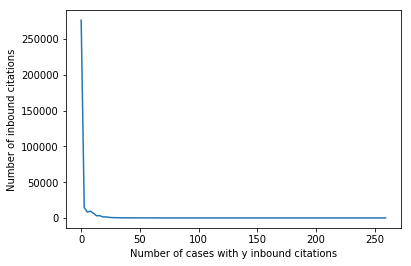

In [20]:
# In Degree distribution of the network

degrees = list(citation_network.out_degree().values())
h, bins= np.histogram(degrees, bins=100)
x_series = bins.compress(h)
y_series = h.compress(h)
plt.plot(x_series, y_series)
plt.xlabel('Number of cases with y outbound citations')
plt.ylabel('Number of inbound citations')
plt.show()

In [15]:
#  might take exponential time.
# Getting the maximal clique graph
G = nx.make_max_clique_graph(CN)


KeyboardInterrupt: 

In [16]:
# Plot a distribution of the triangles
print(nx.triangles(CN,range(1,100)))

{1: 1, 2: 0, 3: 0, 6: 0, 7: 0, 9: 0, 10: 0, 12: 0, 13: 5, 16: 1, 18: 4, 19: 0, 21: 1, 22: 44, 23: 0, 24: 0, 26: 8, 27: 0, 28: 29, 29: 9, 30: 21, 31: 9, 32: 1, 34: 11, 36: 9, 37: 3, 38: 0, 39: 0, 40: 5, 41: 0, 42: 0, 43: 4, 44: 0, 45: 0, 46: 0, 48: 2, 49: 5, 51: 0, 52: 13, 53: 1, 54: 0, 57: 0, 58: 1, 59: 0, 60: 20, 61: 4, 63: 24, 64: 0, 65: 25, 66: 0, 68: 9, 69: 0, 70: 0, 71: 0, 72: 0, 73: 1, 74: 0, 75: 2, 76: 3, 78: 0, 81: 37, 83: 0, 84: 5, 86: 2, 87: 10, 89: 0, 90: 0, 92: 0, 93: 0, 94: 0, 95: 3, 97: 0, 98: 7, 99: 0}


In [ ]:
# A number of link prediction algorithms are given in the Networkx library.
# Can use these as features to train a link prediction neural network


In [27]:
# Page Rank analysis can be very insightful for importance score. Convert the graph into a directed graph.
pr = nx.pagerank(citation_network, alpha=0.9)
h, bins= np.histogram(pr.values(), bins=100)
x_series = bins.compress(h)
y_series = h.compress(h)
plt.plot(x_series, y_series)
plt.xlabel('Number of cases with y outbound citations')
plt.ylabel('Number of inbound citations')
plt.show()

KeyboardInterrupt: 

Exception ignored in: 'zmq.backend.cython.message.Frame.__dealloc__'
Traceback (most recent call last):
  File "zmq/backend/cython/checkrc.pxd", line 12, in zmq.backend.cython.checkrc._check_rc
KeyboardInterrupt


TypeError: unsupported operand type(s) for +: 'dict_values' and 'float'

In [42]:
score_ranges =  np.arange(0.,1.,.00000001)
binning = []

for a in pr.values():
    binning.append(bisect.bisect_left(score_ranges, a))

In [37]:
# Create bar graphs to analyze some visualizations
binning

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [40]:
list(pr.values())[:2]

[2.5488375991096317e-06, 3.926345045302661e-06]

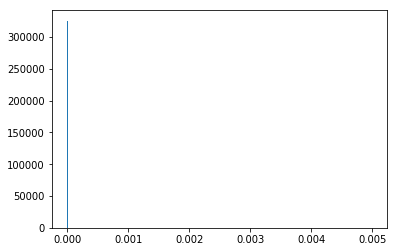

In [46]:
import matplotlib.pyplot as plt
from numpy import array
gn=array(list(pr.values()))
plt.hist(gn.astype('float'),bins=np.arange(0.,0.005,.00001))
plt.show()

In [47]:
nx.readwrite.edgelist.write_edgelist(CN,'citationNetwork_mini.txt')